# Breast Cancer Classification

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing the dataset

In [2]:
df = pd.read_csv('breast-cancer-winconsine.csv')

In [3]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 31)

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Distribution of target i.e. diagnosis

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Calculating and visualization of correlation

In [9]:
correlation = df.corr()

<AxesSubplot:>

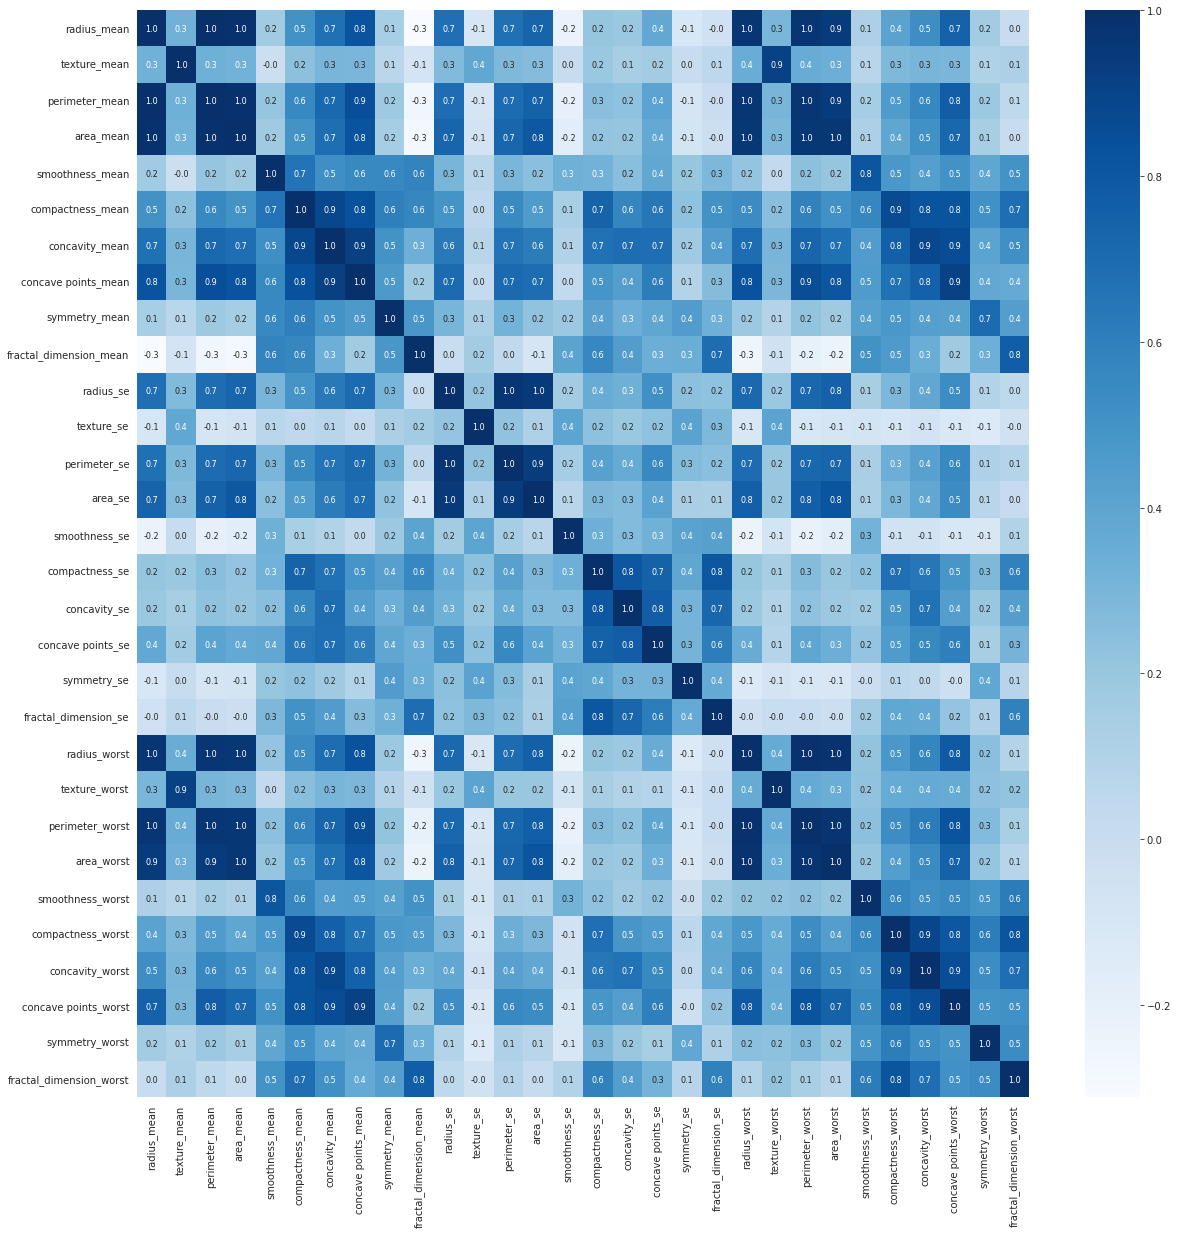

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, cbar=True, cmap='Blues', annot=True, annot_kws={'size': 8}, fmt='.1f')

#### Mean of all featurse with respect to target i.e. diagnosis

In [11]:
df.groupby('diagnosis').mean().reset_index()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


### Encoding the target column i.e. diagnosis which is a cactegorial column
* 1 --> M --> Malignant
* 0 --> B --> Benign

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Separating the data into label and target

In [14]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

### Scaling the values of the features

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = ss.fit_transform(X)

### Splitting the dataset into training and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

### Fitting different models into the training dataset

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Creating a function fit_model to fit the model

In [18]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Logistic Regression

In [19]:
fit_model(LogisticRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1]

The accuracy score:  0.9649122807017544


### 2. Decision Tree Classifier

In [20]:
fit_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1]

The accuracy score:  0.9473684210526315


### 3. Random Forest Classifier

In [21]:
fit_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1]

The accuracy score:  0.9473684210526315


### 4. Support Vector Classifier

In [22]:
fit_model(SVC(), X_train, X_test, y_train, y_test)

The predicted values:
  [1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1]

The accuracy score:  0.9649122807017544


### 5. XGB Classifier

In [23]:
fit_model(XGBClassifier(), X_train, X_test, y_train, y_test)

[06:18:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  [1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1]

The accuracy score:  0.9649122807017544


### 6. XGBRF Classifier

In [24]:
fit_model(XGBRFClassifier(), X_train, X_test, y_train, y_test)

[06:18:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1]

The accuracy score:  0.9473684210526315


### 7. K-Nearest Neighbours Classifier

In [25]:
fit_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1]

The accuracy score:  0.956140350877193
